Project for MSCI446 W24
Group 38
Members: Darren Wihandi, Gonzalo Carretero Hernandez, Haoyu Song, Ran Shi, Tily Tu

Overview:
In this notebook, we will explore a dataset containing various information regarding the bike rental demand in the city of Seoul, South Korea, throughout a year.

Main project type: Supervised learning -> Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Inline plotting
%matplotlib inline

In [3]:
bike_data = pd.read_csv('SeoulBikeData.csv', encoding='latin1')

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### DATA PREPROCESSING

We will follow the following steps:
- 1. Dealing with missing values
- 2. Dealing with duplicates
- 3. Dealing with categorical data
- 4. Dealing with Outliers
- 5. Partitioning the data set
- 6. Feature scaling
- 7. Data visualization

#### Mising Values

In [4]:
# Check for missing values
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There appears to be no missing values

#### Duplicates

In [5]:
# Find duplicate rows
bike_data.duplicated().sum()

0

There appears to be no duplicate values

#### Categorical Data

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We need to deal with:
Date, Seasons, Holiday and Functioning Day

In [7]:
"""
Date: The date format given is not valuable to us per se when it comes to predicting rental. 
Some aspects that perhaps are relevant are the separate months, days of the months and days of the weeks. 
We will add those columns encoded and drop the date column.
"""

bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')
bike_data['Month'] = bike_data['Date'].dt.month
bike_data['Day'] = bike_data['Date'].dt.day
bike_data['Day_of_week'] = bike_data['Date'].dt.dayofweek
# New tabe without the Date column
bike_data = bike_data.drop(columns='Date')
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4


In [8]:
"""
For Seasons, we will use nominal encoding, in particular one-hot encoding
"""
indicator = pd.get_dummies(bike_data['Seasons'])
bike_data = bike_data.join(indicator)
bike_data = bike_data.drop(columns='Seasons')
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,12,1,4,0,0,0,1


In [9]:
"""
For holiday, we will use nominal encoding:
Holiday No: 0
Holiday Yes: 1
"""

bike_data['Holiday'] = bike_data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
bike_data.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,Yes,12,1,4,0,0,0,1


In [10]:
# We saw that on non-functioning days, there are no bikes rented
print(bike_data[(bike_data['Functioning Day'] == 'No') & (bike_data['Rented Bike Count'] > 0)])

Empty DataFrame
Columns: [Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Holiday, Functioning Day, Month, Day, Day_of_week, Autumn, Spring, Summer, Winter]
Index: []


In [11]:
# We will drop the non-functioning days since they don't require prediction
bike_data = bike_data[bike_data['Functioning Day'] == 'Yes']

# We will drop the Functioning Day column
bike_data = bike_data.drop(columns='Functioning Day')

bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,12,1,4,0,0,0,1


#### Outliers

In [12]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,0.048198,6.438984,15.840992,3.009687,0.228825,0.255168,0.260839,0.255168
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,0.214198,3.452362,8.767785,2.008583,0.420101,0.435982,0.439118,0.435982
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,0.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,0.000000,6.000000,16.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,0.000000,9.000000,23.000000,5.000000,0.000000,1.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,1.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000


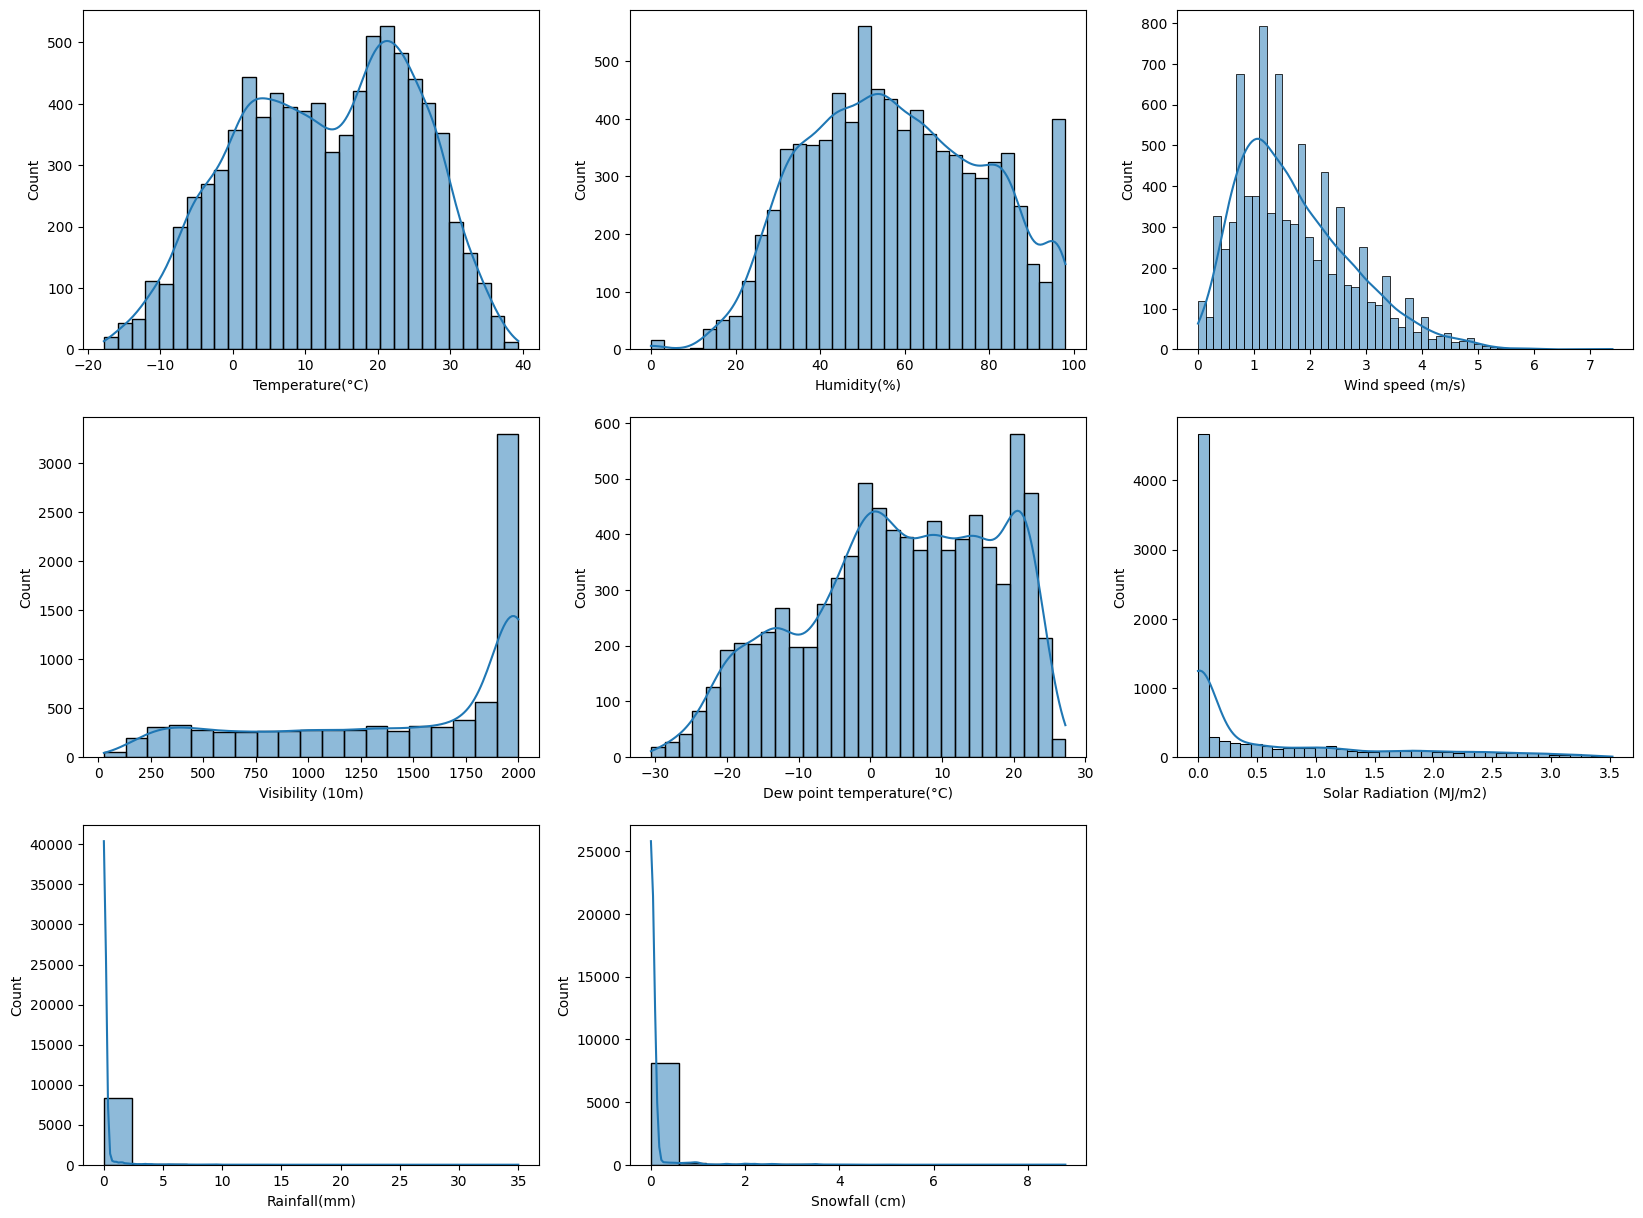

In [13]:
"""
Let's check for outliers
"""

# Histograms of Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar radiation, Rainfall, Snowfall
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.histplot(bike_data['Temperature(°C)'], kde=True)
plt.subplot(3, 3, 2)
sns.histplot(bike_data['Humidity(%)'], kde=True)
plt.subplot(3, 3, 3)
sns.histplot(bike_data['Wind speed (m/s)'], kde=True)
plt.subplot(3, 3, 4)
sns.histplot(bike_data['Visibility (10m)'], kde=True)
plt.subplot(3, 3, 5)
sns.histplot(bike_data['Dew point temperature(°C)'], kde=True)
plt.subplot(3, 3, 6)
sns.histplot(bike_data['Solar Radiation (MJ/m2)'], kde=True)
plt.subplot(3, 3, 7)
sns.histplot(bike_data['Rainfall(mm)'], kde=True)
plt.subplot(3, 3, 8)
sns.histplot(bike_data['Snowfall (cm)'], kde=True)
plt.show()


In [14]:
"""
Since the following columns are normal enough, we will cap the outliers:
- Temperature(°C)
- Humidity(%)
- Wind speed (m/s)
"""
# We will define the outliers as the values that are 3 standard deviations away from the mean
temp = bike_data['Temperature(°C)']
humidity = bike_data['Humidity(%)']
wind_speed = bike_data['Wind speed (m/s)']

temp_mean = temp.mean()
temp_std = temp.std()
temp_outliers = temp[(temp < temp_mean - 3 * temp_std) | (temp > temp_mean + 3 * temp_std)]
print("Temperature outliers:", temp_outliers)

humidity_mean = humidity.mean()
humidity_std = humidity.std()
humidity_outliers = humidity[(humidity < humidity_mean - 3 * humidity_std) | (humidity > humidity_mean + 3 * humidity_std)]
print("Humidity outliers:", humidity_outliers)

wind_speed_mean = wind_speed.mean()
wind_speed_std = wind_speed.std()
wind_speed_outliers = wind_speed[(wind_speed < wind_speed_mean - 3 * wind_speed_std) | (wind_speed > wind_speed_mean + 3 * wind_speed_std)]
print("Wind speed outliers:", wind_speed_outliers)

# Cap the outliers
temp = temp.clip(lower=temp_mean - 3 * temp_std, upper=temp_mean + 3 * temp_std)
humidity = humidity.clip(lower=humidity_mean - 3 * humidity_std, upper=humidity_mean + 3 * humidity_std)
wind_speed = wind_speed.clip(lower=wind_speed_mean - 3 * wind_speed_std, upper=wind_speed_mean + 3 * wind_speed_std)

bike_data['Temperature(°C)'] = temp
bike_data['Humidity(%)'] = humidity
bike_data['Wind speed (m/s)'] = wind_speed


Temperature outliers: Series([], Name: Temperature(°C), dtype: float64)
Humidity outliers: Series([], Name: Humidity(%), dtype: int64)
Wind speed outliers: 85      5.4
87      5.8
89      5.3
249     5.1
253     5.1
       ... 
7835    5.0
7916    5.4
7932    4.9
7937    5.7
7985    4.9
Name: Wind speed (m/s), Length: 62, dtype: float64


#### Partitioning the dataset

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using 80% of the data for training
X_train, X_test, y_train, y_test = train_test_split(bike_data.iloc[:,1:], bike_data.iloc[:,0], test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6772, 17), (1693, 17), (6772,), (1693,))

#### Feature Scaling

In [16]:
"""
We will use normalization to scale the data
"""

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# We will scale the following columns: Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)
X_train[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']] = scaler.fit_transform(X_train[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']])
X_test[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']] = scaler.transform(X_test[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']])
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
8691,3,0.373030,0.387755,0.331350,0.446021,0.365052,0.000000,0.000000,0.0,0,11,28,2,1,0,0,0
6042,18,0.803853,0.877551,0.476316,0.616827,0.970588,0.079545,0.014286,0.0,0,8,9,3,0,0,1,0
4788,12,0.809107,0.459184,0.455607,0.315256,0.794118,0.829545,0.000000,0.0,0,6,18,0,0,0,1,0
6574,22,0.733800,0.816327,0.186385,0.924987,0.882353,0.000000,0.000000,0.0,0,8,31,4,0,0,1,0
3716,20,0.558669,0.469388,0.704119,0.969589,0.574394,0.002841,0.000000,0.0,0,5,4,4,0,1,0,0


In [17]:
X_train.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Day,Day_of_week,Autumn,Spring,Summer,Winter
count,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000,6772.000000
mean,11.478884,0.535777,0.595087,0.356704,0.710944,0.598702,0.161685,0.004285,0.008947,0.049764,6.432812,15.832989,3.019344,0.230065,0.257826,0.258860,0.253249
std,6.898316,0.211077,0.209670,0.211790,0.309694,0.228353,0.246901,0.031084,0.052159,0.217472,3.444443,8.757149,2.008565,0.420905,0.437470,0.438041,0.434904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.366025,0.428571,0.186385,0.457045,0.442907,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.548161,0.581633,0.310641,0.839331,0.614187,0.002841,0.000000,0.000000,0.000000,6.000000,16.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.707531,0.755102,0.476316,1.000000,0.790657,0.264205,0.000000,0.000000,0.000000,9.000000,23.000000,5.000000,0.000000,1.000000,1.000000,1.000000
max,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000


### Model training

Coefficients: 
 [ 2.85523956e+01  8.99759666e+02 -1.16740830e+03  8.47842459e+01
 -1.01635890e+01  7.17389686e+02 -2.83630251e+02 -2.26019329e+03
  2.80752006e+02 -1.23457834e+02  3.59042643e+00 -1.06388315e+00
 -1.28103647e+01  1.52587887e+02  3.58708090e+01  5.91419747e+00
 -1.94372894e+02]
Mean squared error: 174037.25
Coefficient of determination: 0.56
Model score: 0.5566905478703529


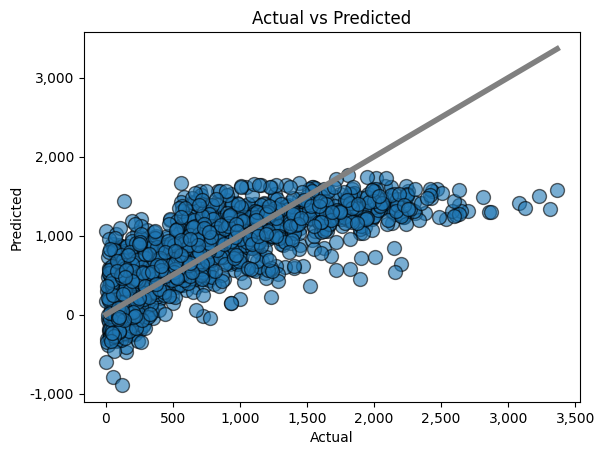

In [20]:
# We will use a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

print(f'Model score: {model.score(X_test, y_test)}')
# Plot outputs
"""
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
"""

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.show()

In [23]:
from sklearn.linear_model import Lasso

for a in [0.1, 0.5, 1, 5, 10, 50, 100]:
    model_la = Lasso(alpha=a)
    model_la.fit(X_train, y_train)
    print(f'Alpha: {a}')
    print(f'Model score: {model_la.score(X_test, y_test)}')
    print(f'Number of coefficients: {np.sum(model_la.coef_ != 0)}')


Alpha: 0.1
Model score: 0.5571024266262846
Number of coefficients: 16
Alpha: 0.5
Model score: 0.5569871309303327
Number of coefficients: 15
Alpha: 1
Model score: 0.5552183389023784
Number of coefficients: 13
Alpha: 5
Model score: 0.5354730771359202
Number of coefficients: 10
Alpha: 10
Model score: 0.5252720344394771
Number of coefficients: 9
Alpha: 50
Model score: 0.3892456965270109
Number of coefficients: 5
Alpha: 100
Model score: 0.2818252396097607
Number of coefficients: 3


In [25]:
from sklearn.linear_model import Ridge

for a in [0.1, 0.5, 1, 5, 10, 50, 100]:
    model_r = Ridge(alpha=a)
    model_r.fit(X_train, y_train)
    print(f'Alpha: {a}')
    print(f'Model score: {model_r.score(X_test, y_test)}')

Alpha: 0.1
Model score: 0.556795571648286
Alpha: 0.5
Model score: 0.5571113810167576
Alpha: 1
Model score: 0.5573277383927331
Alpha: 5
Model score: 0.5564894172721777
Alpha: 10
Model score: 0.5544546282988947
Alpha: 50
Model score: 0.5424941399383056
Alpha: 100
Model score: 0.532113081079381


In [30]:
# Given the shape of the data, we will use polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

print(f'Model score: {model_poly.score(X_test_poly, y_test)}')


Model score: 0.7166598380302147


In [33]:
# Decision Tree
# from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

print(f'Model score: {model_dt.score(X_test, y_test)}')

model_text = tree.export_text(model_dt, feature_names=list(X_train.columns))
print(model_text)

Model score: 0.8320051479063395
|--- Temperature(°C) <= 0.50
|   |--- Autumn <= 0.50
|   |   |--- Hour <= 6.50
|   |   |   |--- Hour <= 1.50
|   |   |   |   |--- Temperature(°C) <= 0.45
|   |   |   |   |   |--- Day_of_week <= 4.50
|   |   |   |   |   |   |--- Dew point temperature(°C) <= 0.57
|   |   |   |   |   |   |   |--- Temperature(°C) <= 0.31
|   |   |   |   |   |   |   |   |--- Month <= 7.50
|   |   |   |   |   |   |   |   |   |--- Temperature(°C) <= 0.18
|   |   |   |   |   |   |   |   |   |   |--- Day <= 29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- Day >  29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Temperature(°C) >  0.18
|   |   |   |   |   |   |   |   |   |   |--- Humidity(%) <= 0.66
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- Humidity(%

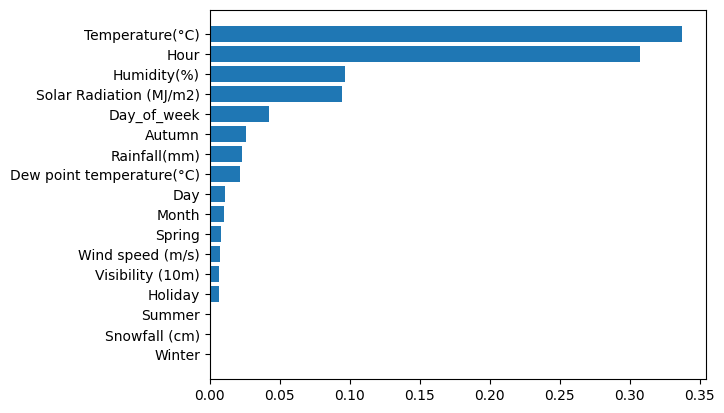

In [34]:
fi = model_dt.feature_importances_

names = X_train.columns
fi, names = zip(*sorted(zip(fi, names)))
plt.barh(range(len(names)), fi, align='center')
plt.yticks(range(len(names)), names)
plt.show()

Depth of the model yielding minimum test MSE is: 12
Optimized model has MSE: 54986.01116810983
Optimized model has accuracy: -75.34578509618328


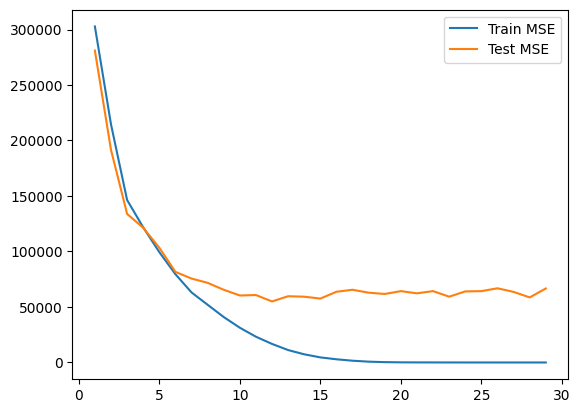

In [38]:
mse = {'k':[], 'train_mse':[], 'test_mse':[]}
for k in range(1,30):
    print("Fit with max_depth:", k, end='\r', flush=True)
    
    model = tree.DecisionTreeRegressor(max_depth=k)
    model = model.fit(X_train, y_train)
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)

    mse['k'].append(k)
    mse['train_mse'].append(mean_squared_error(y_train, preds_train))
    mse['test_mse'].append(mean_squared_error(y_test, preds_test))

idx = mse['test_mse'].index(min(mse['test_mse']))
print('Depth of the model yielding minimum test MSE is:', mse['k'][idx])
print('Optimized model has MSE:', min(mse['test_mse']))

plt.plot(mse['k'], mse['train_mse'], label='Train MSE')
plt.plot(mse['k'], mse['test_mse'], label='Test MSE')
plt.legend()
plt.show()



--------------------------- Below this is going to be modified -----------------------

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

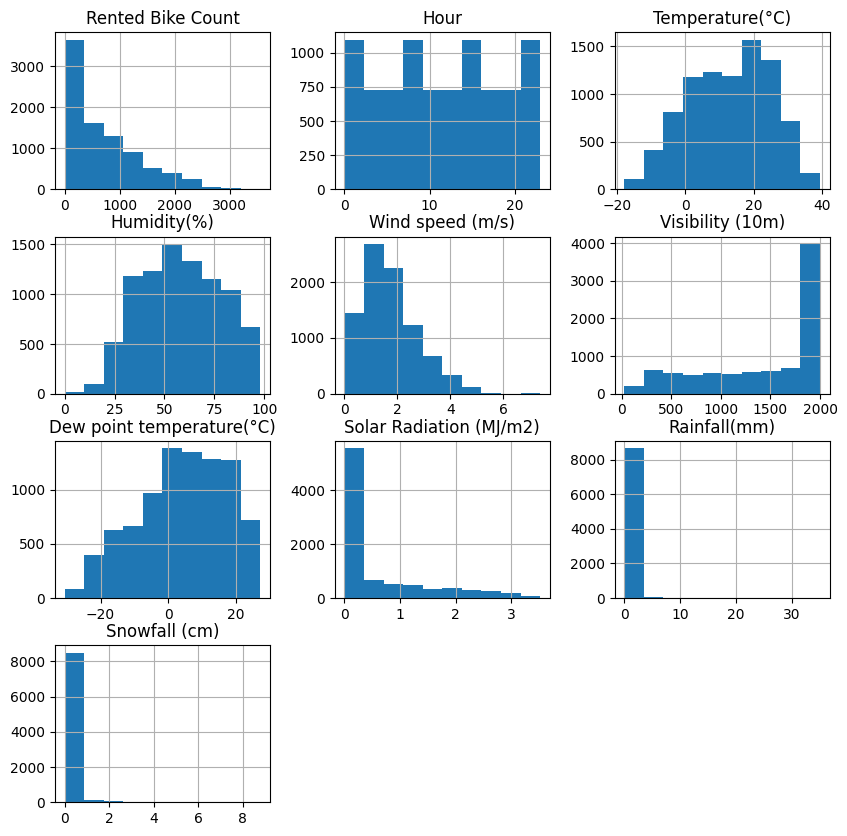

In [14]:
bike_data.hist(figsize=(10, 10))

<Axes: >

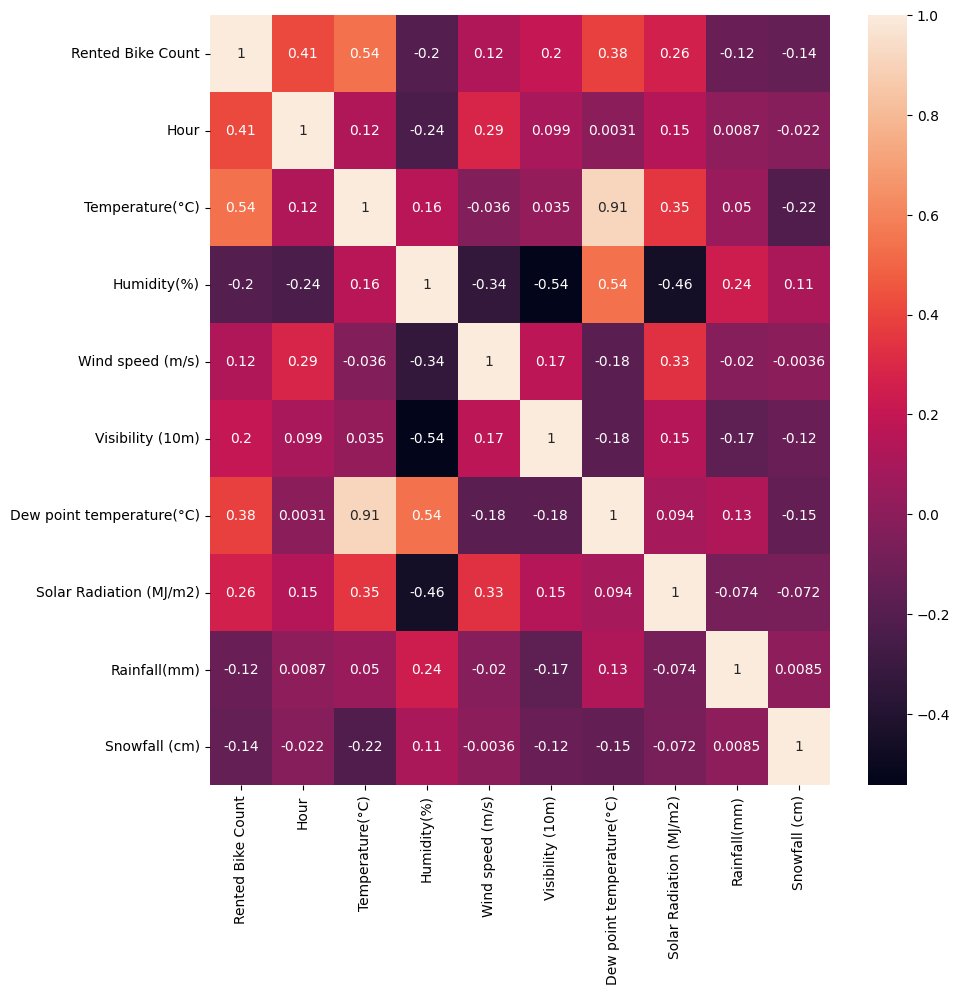

In [19]:
plt.figure(figsize=(10, 10))
good = bike_data.drop(['Date','Functioning Day', 'Seasons', 'Holiday'], axis=1)
sns.heatmap(good.corr(), annot=True)

array([[<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>]], dtype=object)

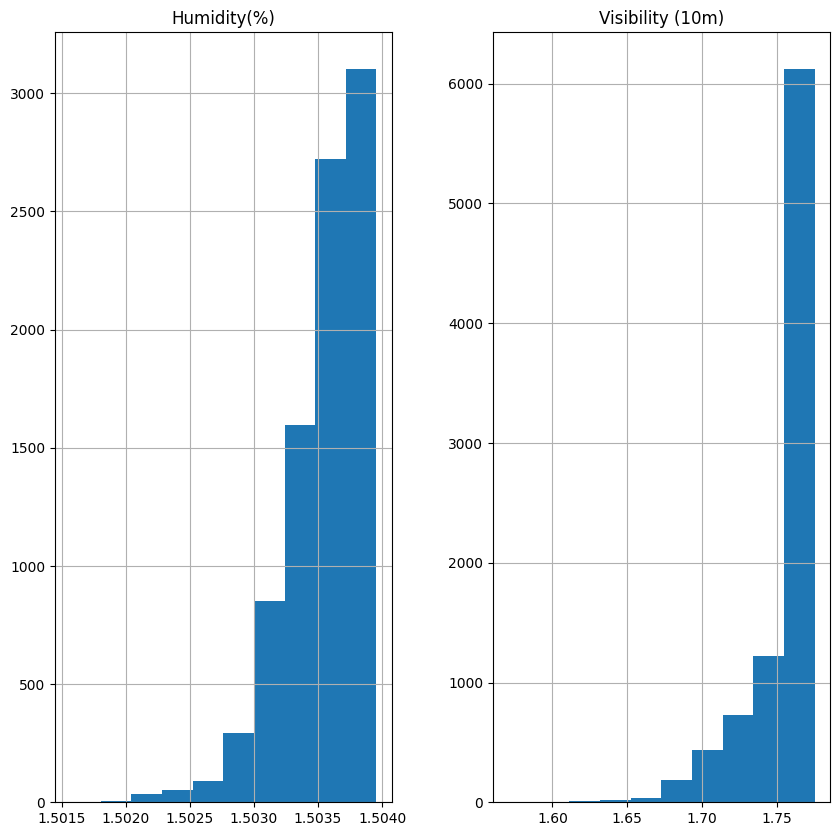

In [28]:
good['Humidity(%)'] = np.sqrt(good['Humidity(%)'] + 1)
good['Visibility (10m)'] = np.sqrt(good['Visibility (10m)'] + 1)
good[['Humidity(%)', 'Visibility (10m)']].hist(figsize=(10, 10))

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

good_good = good.dropna()

x = good_good.drop(['Rented Bike Count'], axis=1)
y = good_good['Rented Bike Count']



In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.4777004760271144

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.7727181960467946

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

grid = GridSearchCV(forest, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)
grid.best_params_
grid.best_score_

0.7621509362249931